In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# The scatterplots

## Load and explore the data

For our consideration, we will work with the classic, oft-used  `auto` dataset, that explores the impact of various automobile engine characteristics on the mileage of the automobile. Perhaps the reader has encountered this dataset before, especially in other SupportVectors workshops, or perhaps in other data science or machine learning textbooks.

This data has some missing values, which we will elide, before we continue with the visualization journey.

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/Auto.csv'
data = pd.read_csv(source)
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
114,26.0,4,98.0,90,2265,15.5,73,2,fiat 124 sport coupe
278,31.5,4,89.0,71,1990,14.9,78,2,volkswagen scirocco
237,30.5,4,98.0,63,2051,17.0,77,1,chevrolet chevette
57,24.0,4,113.0,95,2278,15.5,72,3,toyota corona hardtop
72,15.0,8,304.0,150,3892,12.5,72,1,amc matador (sw)


In [3]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,397.0,NaN,NaN,NaN,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,NaN,NaN,NaN,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,NaN,NaN,NaN,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
horsepower,397,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,397.0,NaN,NaN,NaN,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,NaN,NaN,NaN,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,NaN,NaN,NaN,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,NaN,NaN,NaN,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0
name,397,304,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, the feature `name` of an automobile is irrelevant to its mileage; therefore, we will drop it. We will also drop records where `horsepower` has missing values as `?`. Next, we will convert `horsepower` to a numerical value, and `origin` to a `string` value. (We know, *a priori* from the documentation of the dataset that the geographical origin of the automobile is encoded as a number `1, 2, 3`.

In [4]:
data = data[data.horsepower !='?'] \
            .astype({'horsepower':'float', 'origin':'string'}) \
            .drop(columns='name')

## Scatterplots using `matplotlib`

First, let us see how we can render the scatterplots using `matplotlib`.

### A simple scatter plot

Let us start by plotting a simple scatterpoint of `horsepower` vs `mpg`.

<Axes: xlabel='horsepower', ylabel='mpg'>

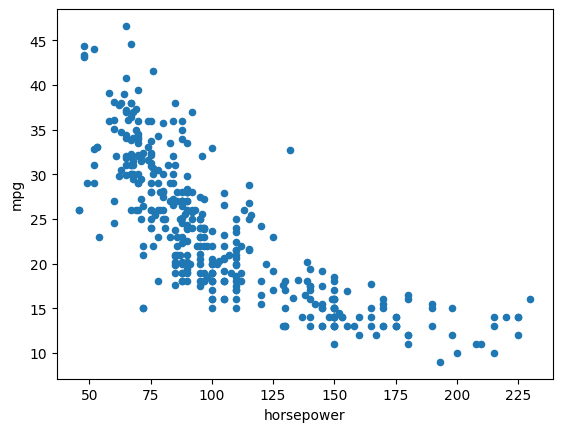

In [6]:
plt.style.use('default')
data.plot.scatter(x='horsepower', y='mpg')

As usual, it produces a graph that leaves a lot to be desired to make it look aethetically pleasing. Let us re-tread the path we have taken with the previous notebooks pertaining to the bar plots.

### Applying a dash of style 

We will do the following:

* resize the figure
* apply the `ggplot` theme
* pick a color for the points
* add a bit of transparency, for aesthetics
* increase the size of the points
* add a title
* slightly change the `xlabel` and `ylabel`.
* improve the text formatting with $\LaTeX$ typesetting
* finally, set a tight layout and remove output clutter

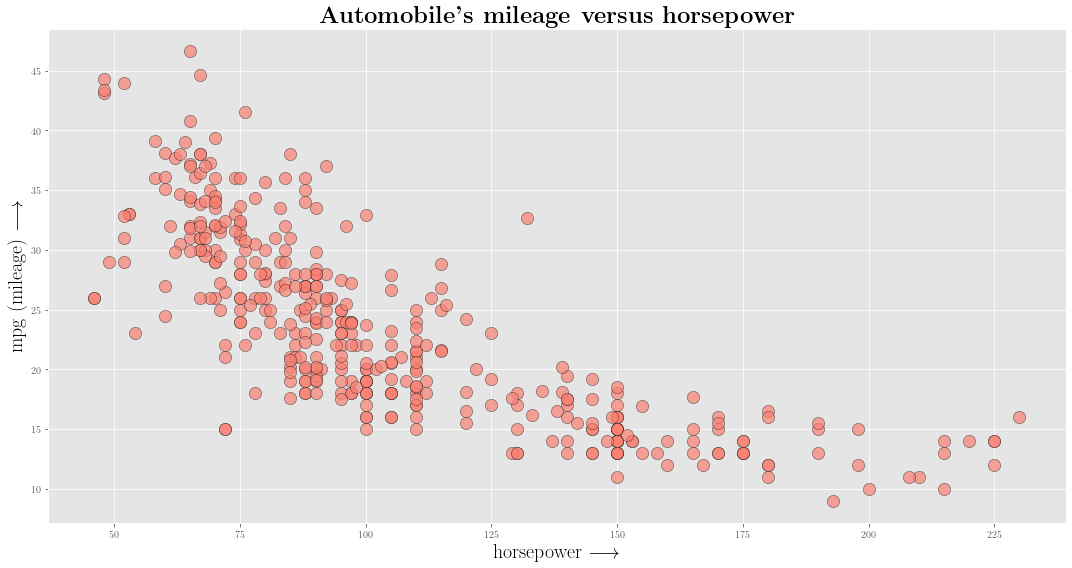

In [7]:

from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True)  
rc ('font', size=16)

plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 13         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72   
plt.rcParams[ 'figure.figsize' ] = '15,8'            # resize

data.plot.scatter(x='horsepower', 
                  y='mpg', 
                  s=150,
                  c='salmon',
                  edgecolor='k',
                  alpha=0.7)

plt.title(r"\textbf{Automobile's mileage versus horsepower}", size=24)
plt.xlabel(r"{horsepower $\longrightarrow$}", size=20)
plt.ylabel(r"{mpg (mileage) $\longrightarrow$}", size=20)

plt.tight_layout()

Perhaps it would be instructive to further color each of the datum in the graph by the weight of the automobile it represents.

We also show the use of `secondary-axis`, and the fine details of moving the title and labels around.

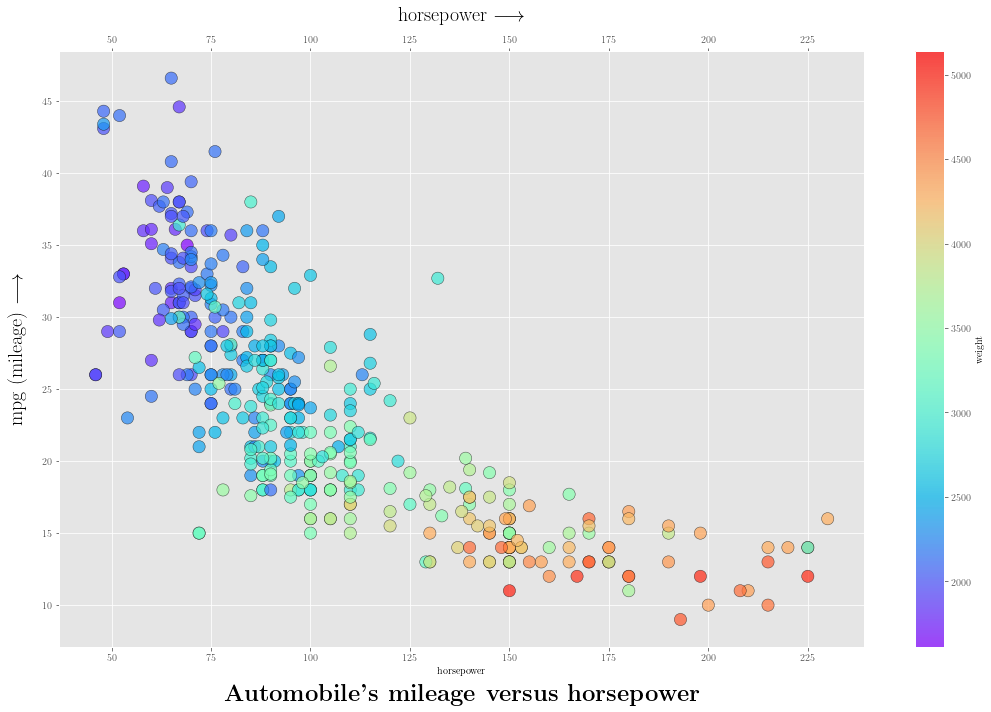

In [9]:

from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) 
rc ('font', size=16)

plt.style.use ('ggplot')                      # emulate ggplot styleviridis
plt.rcParams['legend.fontsize' ] = 13         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72   
plt.rcParams[ 'figure.figsize' ] = '15,10'            # resize
plt.rcParams['figure.autolayout']= True

ax = data.plot.scatter(x='horsepower', 
                  y='mpg', 
                  s=150,
                  edgecolor='k',
                  alpha=0.7,
                  c='weight',
                  cmap='rainbow'
                 )
#plt.gcf().subplots_adjust(bottom=0.9, top=1)
plt.title(r"\textbf{Automobile's mileage versus horsepower}", size=24, loc='center', y=-0.1)
plt.ylabel(r"{mpg (mileage) $\longrightarrow$}", size=20, labelpad=15)
secax = ax.secondary_xaxis('top')
secax.set_xlabel(r"{horsepower $\longrightarrow$}", size=20, labelpad=15)

plt.tight_layout()

Next, we will explore how we can color each of the datum by the geographical origin of the automobile it represents. Since we are dealing with a categorical feature, we need to first group the data by it.

Note that currently there seems to be no direct way to use `pandas.DataFrame.plot.scatter` to do this, so we revert to explicitly the `matplotlib`.

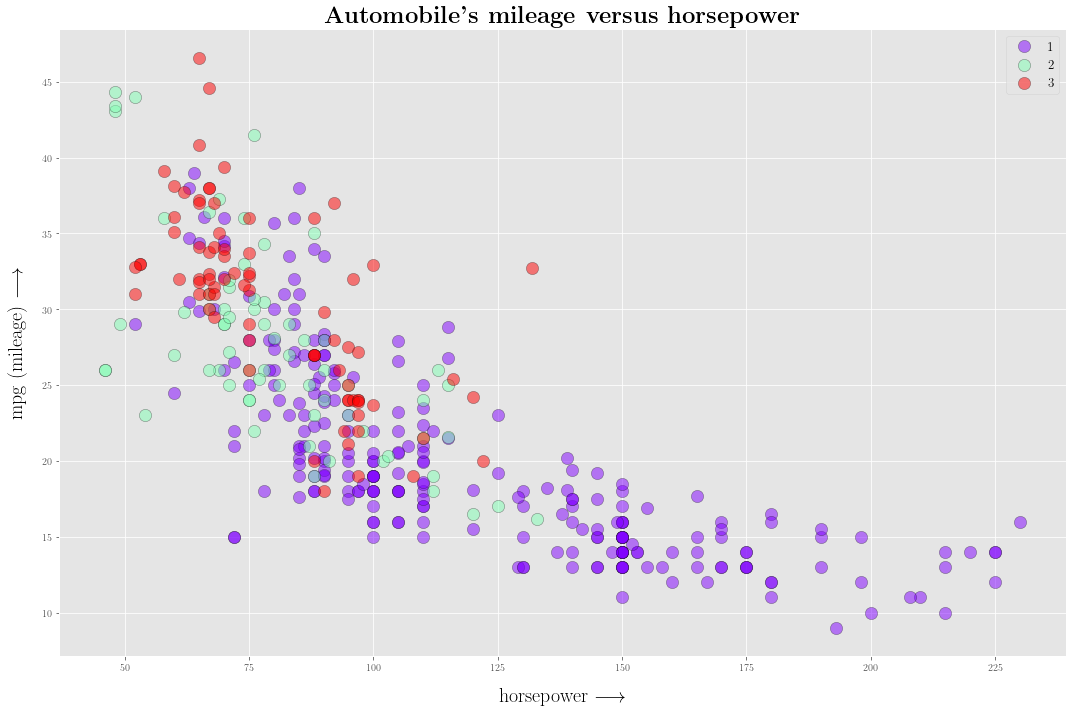

In [10]:



groups = data.groupby(by='origin')
colors = plt.cm.rainbow(np.linspace(0,         # picking the N separate colors from a colormap
                                    1, 
                                    len(data.origin.unique())))
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) 
rc ('font', size=16)

plt.style.use ('ggplot')                      # emulate ggplot styleviridis
plt.rcParams['legend.fontsize' ] = 13         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72   
plt.rcParams[ 'figure.figsize' ] = '15,10'            # resize
plt.rcParams['figure.autolayout']= True




fig, ax = plt.subplots()
for index, (name, group) in enumerate(groups):
   
    ax.scatter(data = group, x='horsepower', 
                  y='mpg', 
                  s=150,
                  edgecolor='k',
                  alpha=0.5,
                  label=name,
                  color=colors[index],
                 )

plt.legend()

plt.title(r"\textbf{Automobile's mileage versus horsepower}", size=24, loc='center')
plt.ylabel(r"{mpg (mileage) $\longrightarrow$}", size=20, labelpad=15)
plt.xlabel(r"{horsepower $\longrightarrow$}", size=20, labelpad=15)

plt.tight_layout()

Observe how we have managed to use color to add another dimension to the plot, making it represent three features `mpg`, `horsepower`, and `origin`.

We can take it one step further, by harnessing the size of the points to represent another scalar feature, say, number of cylinders. Thus in total we now are showing a four-dimensional projection of the data. In order to make the size distinctions cleared, we have played with it a bit, and used the size to be proportional to $2^\text{cylinders}$.

On doing so, we notice that the plot has an interesting story to tell -- most low mileage cars seem to be of high horsepower, originate from the geographical location `1`, and contain a relatively high number of cylinders.

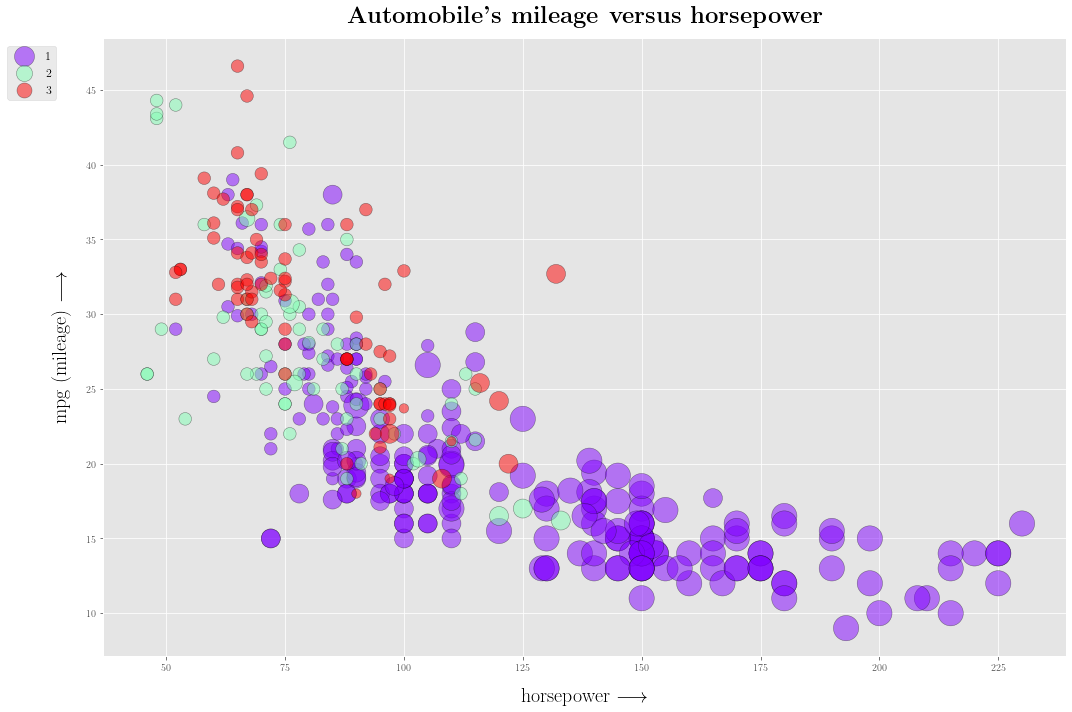

In [11]:
groups = data.groupby(by='origin')
colors = plt.cm.rainbow(np.linspace(0,         # picking the N separate colors from a colormap
                                    1, 
                                    len(data.origin.unique())))
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True) 
rc ('font', size=16)

plt.style.use ('ggplot')                      # emulate ggplot styleviridis
plt.rcParams['legend.fontsize' ] = 13         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72   
plt.rcParams[ 'figure.figsize' ] = '15,10'            # resize
plt.rcParams['figure.autolayout']= True



data['size'] = 10*np.power(data.cylinders, 2)

fig, ax = plt.subplots()
for index, (name, group) in enumerate(groups):
   
    ax.scatter(data = group, x='horsepower', 
                  y='mpg', 
                  s='size',
                  edgecolor='k',
                  alpha=0.5,
                  label=name,
                color=colors[index],
                 )

plt.legend(fontsize=12, loc=[-0.1, 0.9], )

plt.title(r"\textbf{Automobile's mileage versus horsepower}", size=24, loc='center', pad=15)
plt.ylabel(r"{mpg (mileage) $\longrightarrow$}", size=20, labelpad=15)
plt.xlabel(r"{horsepower $\longrightarrow$}", size=20, labelpad=15)

plt.tight_layout()

### Adding annotations

Sometimes, to explain vital parts of the data, it may desirable to draw attention to a few facts. The `matplotlib.pyplot.annotate()` function provides a simple and powerful means to do this.

Let us draw attention to the automobiles with the highest and lowest mileage and horsepower, respectively. First, we need to identify these rows in the data.

In [12]:
min_mpg = data[data.mpg == data.mpg.min()].iloc[0]
max_mpg = data[data.mpg == data.mpg.max()].iloc[0]

min_hp = data[data.horsepower == data.horsepower.min()].iloc[0]
max_hp = data[data.horsepower == data.horsepower.max()].iloc[0]

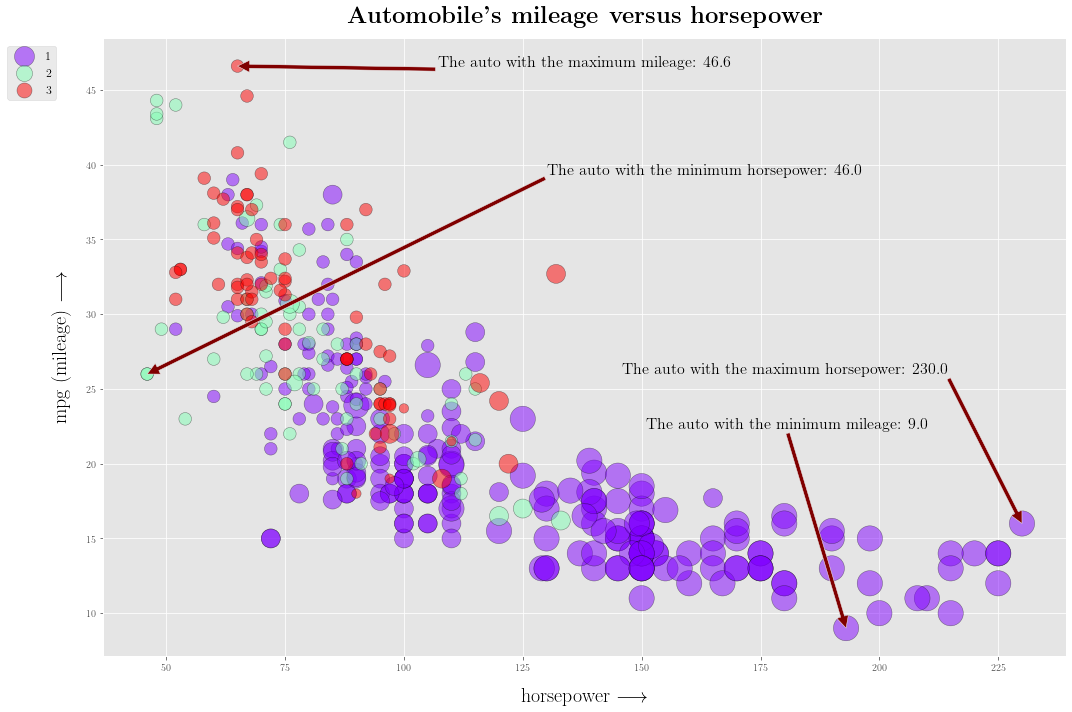

In [13]:
from matplotlib import rc
groups = data.groupby(by='origin')
colors = plt.cm.rainbow(np.linspace(0,         # picking the N separate colors from a colormap
                                    1,
                                    len(data.origin.unique())))
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=16)

plt.style.use('ggplot')                      # emulate ggplot styleviridis
plt.rcParams['legend.fontsize'] = 13         # legend font size
plt.rcParams['axes.labelsize'] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = '15,10'            # resize
plt.rcParams['figure.autolayout'] = True


data['size'] = 10*np.power(data.cylinders, 2)

fig, ax = plt.subplots()
for index, (name, group) in enumerate(groups):

    ax.scatter(data=group, x='horsepower',
               y='mpg',
               s='size',
               edgecolor='k',
               alpha=0.5,
               label=name,
               color=colors[index],
               )

plt.legend(fontsize=12, loc=[-0.1, 0.9], )

plt.title(r"\textbf{Automobile's mileage versus horsepower}",
          size=24, loc='center', pad=15)
plt.ylabel(r"{mpg (mileage) $\longrightarrow$}", size=20, labelpad=15)
plt.xlabel(r"{horsepower $\longrightarrow$}", size=20, labelpad=15)

# annotations
min_mpg_text = f'The auto with the minimum mileage: {min_mpg.mpg}'
max_mpg_text = f'The auto with the maximum mileage: {max_mpg.mpg}'
min_hp_text = f'The auto with the minimum horsepower: {min_hp.horsepower}'
max_hp_text = f'The auto with the maximum horsepower: {max_hp.horsepower}'

plt.annotate(min_mpg_text,
             xy=(min_mpg.horsepower, min_mpg.mpg),
             xytext=(-200, 200),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.annotate(max_mpg_text,
             xy=(max_mpg.horsepower, max_mpg.mpg),
             xytext=(200, 0),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.annotate(min_hp_text,
             xy=(min_hp.horsepower, min_hp.mpg),
             xytext=(400, 200),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.annotate(max_hp_text,
             xy=(max_hp.horsepower, max_hp.mpg),
             xytext=(-400, 150),
             textcoords='offset points',
             arrowprops=dict(facecolor='maroon', width=4,),
             fontsize=16
             )

plt.tight_layout()

### Zoomed view box

We can also add a zoomed view of some region of the plot we want to highlight. There are many ways to do it, so we will explore only one of them here.

Let us say that we want to zoom into the data by subsections of the horsepower. We can create a subplot for each of those sub-regions, and then show what regions they are zooming. Let us say we want to focus on the following subregions of the plot:

1. `0 < horsepower < 75`
2. `80<= horsepower < 120`
2. `125<= horsepower < 180`

In the main plot, we will shade these regions separately.


In [14]:
part_1 = data.query('horsepower < 75').groupby(by='origin')
part_2 = data.query('horsepower >= 80 & horsepower < 120').groupby(by='origin')
part_3 = data.query('horsepower >= 125 & horsepower < 180').groupby(by='origin')


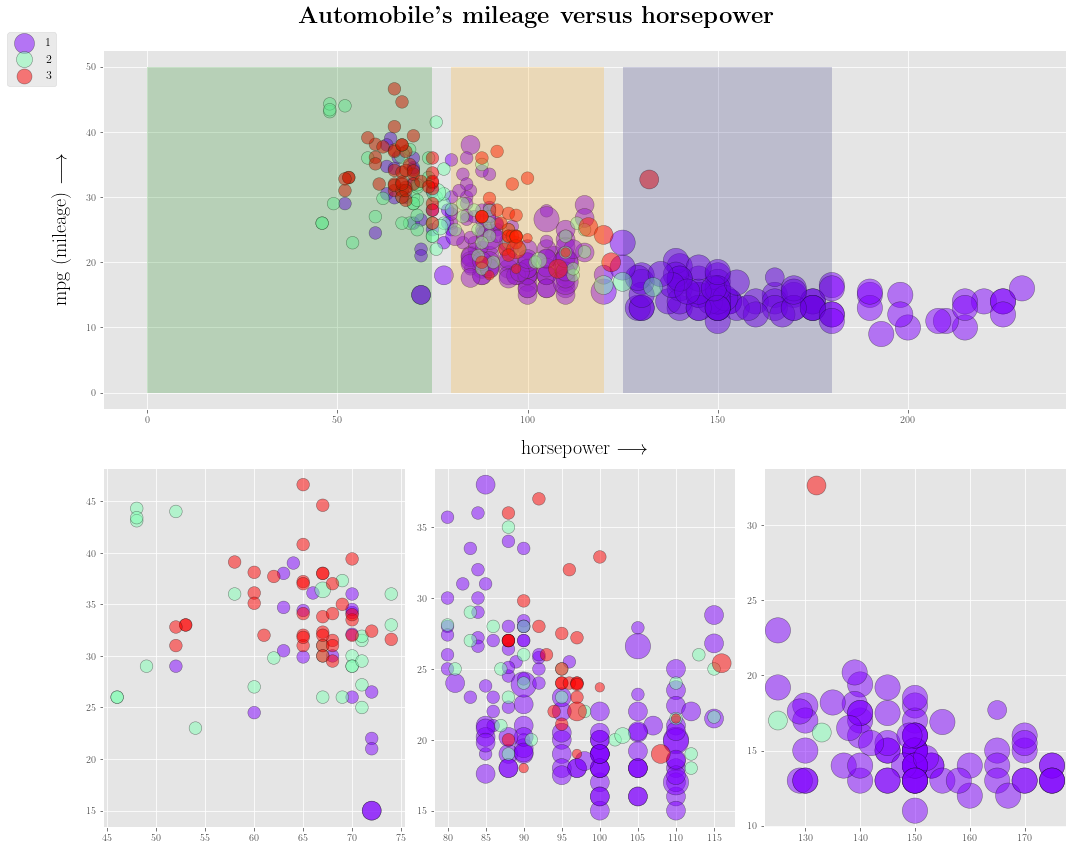

In [15]:
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=16)

plt.style.use('ggplot')                      # emulate ggplot styleviridis
plt.rcParams['legend.fontsize'] = 13         # legend font size
plt.rcParams['axes.labelsize'] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = '15,12'            # resize
plt.rcParams['figure.autolayout'] = True


fig = plt.figure()

main = fig.add_subplot(2, 1, 1)
left = fig.add_subplot(2, 3, 4)
center = fig.add_subplot(2, 3, 5)
right = fig.add_subplot(2, 3, 6)

data['size'] = 10*np.power(data.cylinders, 2)
groups = data.groupby(by='origin')
colors = plt.cm.rainbow(np.linspace(0,         # picking the N separate colors from a colormap
                                    1,
                                    len(data.origin.unique())))

# as before, first draw the main plot
for index, (name, group) in enumerate(groups):

    main.scatter(data=group, x='horsepower',
                 y='mpg',
                 s='size',
                 edgecolor='k',
                 alpha=0.5,
                 label=name,
                 color=colors[index],
                 )

main.legend(fontsize=12, loc=[-0.1, 0.9], )
main.set_ylabel(r"{mpg (mileage) $\longrightarrow$}", size=20, labelpad=15)
main.set_xlabel(r"{horsepower $\longrightarrow$}", size=20, labelpad=15)

# next draw the three regions
for index, (name, group) in enumerate(part_1):
    left.scatter(data=group, x='horsepower',
                     y='mpg',
                     s='size',
                     edgecolor='k',
                     alpha=0.5,
                     label=name,
                     color=colors[index],
                     )
for index, (name, group) in enumerate(part_2):
    center.scatter(data=group, x='horsepower',
                     y='mpg',
                     s='size',
                     edgecolor='k',
                     alpha=0.5,
                     label=name,
                     color=colors[index],
                     )
for index, (name, group) in enumerate(part_3):
    right.scatter(data=group, x='horsepower',
                     y='mpg',
                     s='size',
                     edgecolor='k',
                     alpha=0.5,
                     label=name,
                     color=colors[index],
                     )

# Color the three regions
main.fill_between((0,75), 0, 50, facecolor='green', alpha=0.2) # blocked area for first axes
main.fill_between((80,120), 0, 50, facecolor='orange', alpha=0.2) # blocked area for second axes
main.fill_between((125,180), 0, 50, facecolor='midnightblue', alpha=0.2) # blocked area for second axes

    
    
    
    
    
fig.suptitle(r"\textbf{Automobile's mileage versus horsepower}",
          size=24)
plt.tight_layout()

### Gridspec for finer control of geometry

### 3D scatterplot

Creating 3-dimensional scatter plots in `matplotlib` is a straightforward extension.

Let us render create a scatterplot where we have three axes:

1. horsepower
2. weight
3. mpg

Let us color-code each datum by origin. For this, let us create another column, called `color` in our data.


In [16]:
colors = plt.cm.rainbow(np.linspace(0,         # picking the N separate colors from a colormap
                                    1,
                                    len(data.origin.unique())))

def f(row):
    return colors[int(row['origin']) -1]

data['color'] = data.apply(f, axis=1)

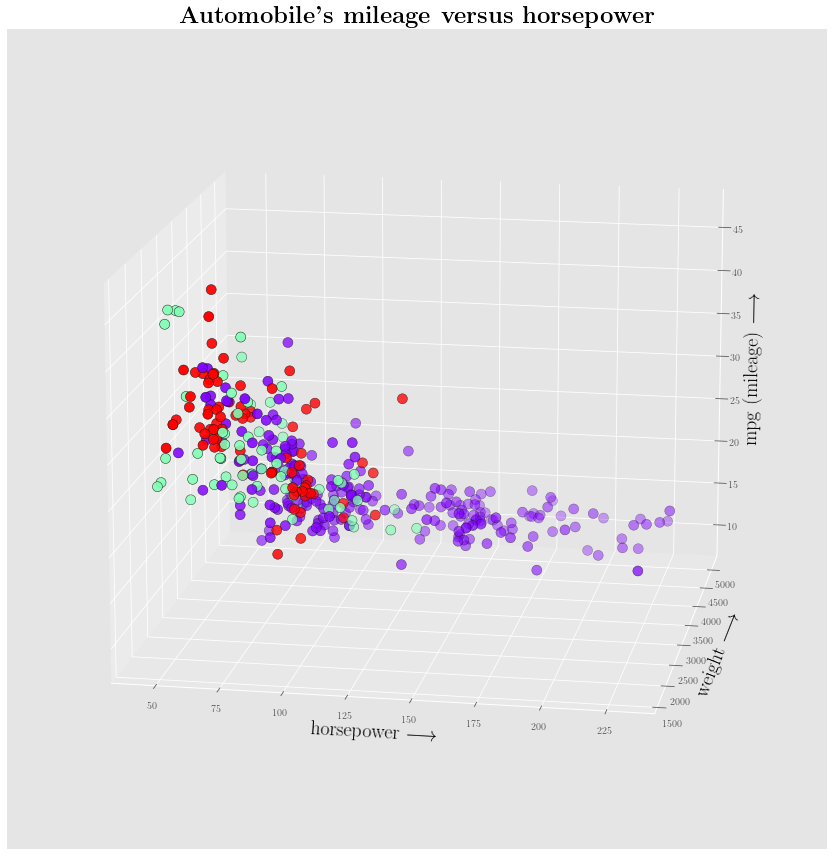

In [17]:
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=16)

plt.style.use('ggplot')                      # emulate ggplot styleviridis
plt.rcParams['legend.fontsize'] = 13         # legend font size
plt.rcParams['axes.labelsize'] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.figsize'] = '15,12'            # resize
plt.rcParams['figure.autolayout'] = True



fig = plt.figure()

colors = plt.cm.rainbow(np.linspace(0,         # picking the N separate colors from a colormap
                                    1,
                                    len(data.origin.unique())))

# Add 3d scatter plot
ax = fig.add_subplot(111, projection="3d")



ax.scatter(data.horsepower, data.weight, data.mpg, 
           c = data.color,
           #cmap=plt.cm.jet, 
           s=100, 
           edgecolor='k', label=data.origin)
ax.view_init(15, -80)

ax.set_title(r"\textbf{Automobile's mileage versus horsepower}", size=24)
ax.set_xlabel(r"{horsepower $\longrightarrow$}", size=20)
ax.set_ylabel(r"{weight $\longrightarrow$}", size=20)
ax.set_zlabel(r"{mpg (mileage) $\longrightarrow$}", size=20)

plt.tight_layout()

### The well-known S-Curve 

The well-known S-curve dataset shows up often in machine learning, especially in the context of manifold learning. Let us plot it below. This example is adapted from the matplotlib datasets docs on their website.

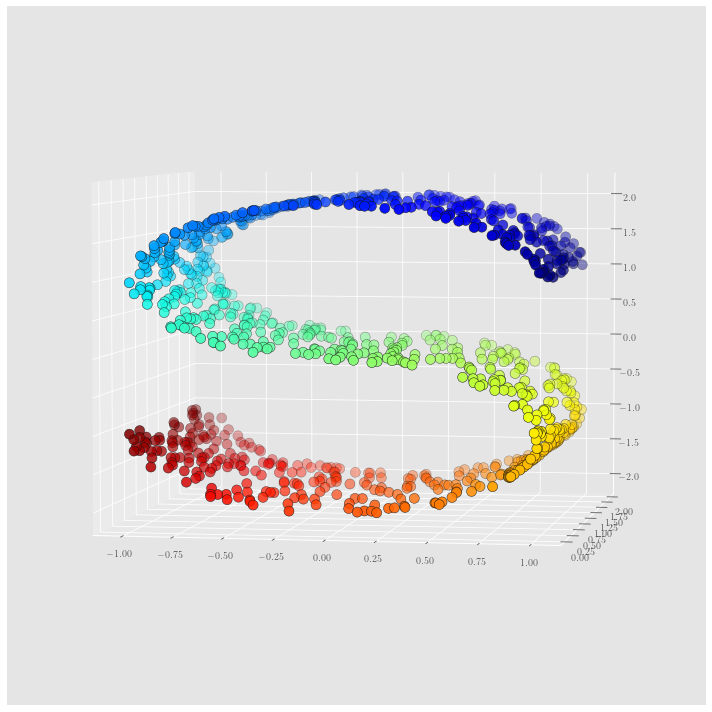

In [18]:
from sklearn.datasets import make_s_curve


n_points = 1000
X, color = make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
fig = plt.figure(figsize=(20, 10))
# Add 3d scatter plot
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           c=color, 
           cmap=plt.cm.jet, 
           s=100, 
           edgecolor='k', )
ax.view_init(4, -80)



### The well-known S-Curve 

The well-known S-curve dataset shows up often in machine learning, especially in the context of manifold learning. Let us plot it below. This example is adapted from the matplotlib datasets docs on their website.

### Swiss roll: another well-known dataset

This dataset too occurs, especially in the case of manifold learning. This example too is adapted from the matplotlib documentation <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py">here.</a>

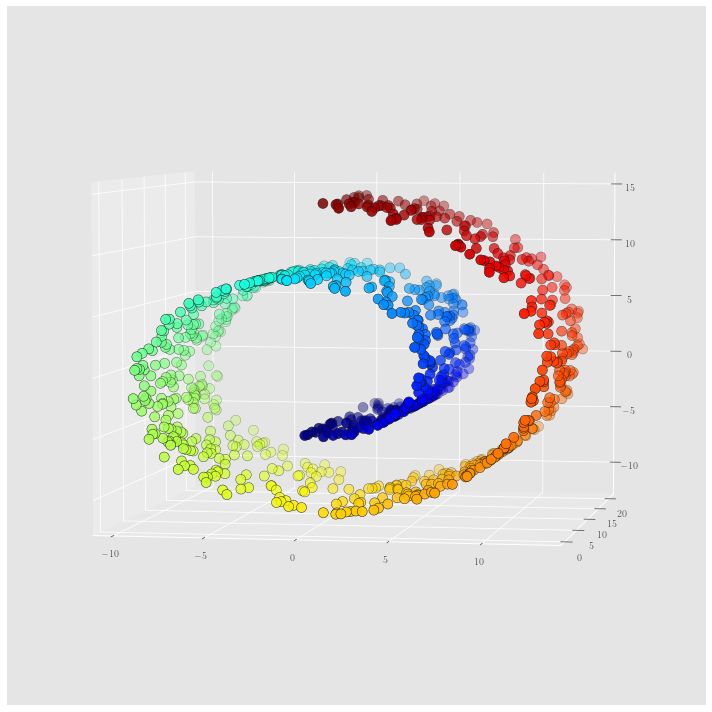

In [19]:
from sklearn.datasets import make_swiss_roll


n_samples = 1500
noise = 0.01
X, color = make_swiss_roll(n_points)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(20, 10))
# Add 3d scatter plot
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
           c=color, 
           cmap=plt.cm.jet, 
           s=100, 
           edgecolor='k', )
ax.view_init(4, -80)